In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import glob


# plt.rcParams.update({'figure.facecolor':'white'})   

# Data merging

In [2]:
def import_sensor_data(sensor):
    path = r'../data/SensorCommunity' # use your path
    all_files = glob.glob(path + "/*.csv")

    li = []

    for filename in all_files:
        if sensor in filename:
            df = pd.read_csv(filename, index_col=None, header=0)
            li.append(df)

    return pd.concat(li, axis=0, ignore_index=True)

In [3]:

df_sds = import_sensor_data("sds").drop(['durP1', 'durP2', 'ratioP1', 'ratioP2', 'sensor_type', 'location'], axis=1)

In [18]:
df_sds.timestamp = pd.to_datetime(df_sds.timestamp)
df_sds['hour'] = df_sds.timestamp.dt.hour
df_sds['date'] = pd.to_datetime(df_sds.timestamp.dt.date)

In [19]:
df_sds.head()

,sensor_id,sensor_type,location,lat,lon,timestamp,P1,durP1,ratioP1,P2,durP2,ratioP2,hour,date
0,29548,SDS011,16487,53.094,8.800,2021-10-01 00:00:06,4.90,NaN,NaN,1.6,NaN,NaN,0,2021-10-01
1,41149,SDS011,26889,53.068,8.796,2021-10-01 00:00:10,4.77,NaN,NaN,1.2,NaN,NaN,0,2021-10-01
2,11854,SDS011,5987,53.140,8.904,2021-10-01 00:00:13,3.77,NaN,NaN,1.4,NaN,NaN,0,2021-10-01
3,5125,SDS011,2581,53.112,8.896,2021-10-01 00:00:14,5.47,NaN,NaN,0.9,NaN,NaN,0,2021-10-01
4,18421,SDS011,9338,53.132,8.708,2021-10-01 00:00:39,0.90,NaN,NaN,0.5,NaN,NaN,0,2021-10-01


In [20]:
df_sds.shape

(42879941, 14)

In [21]:
df_sds.query("sensor_id==1072").count()

sensor_id      154909
sensor_type    154909
location       154909
lat            154909
lon            154909
timestamp      154909
P1             154909
durP1               0
ratioP1             0
P2             154908
durP2               0
ratioP2             0
hour           154909
date           154909
dtype: int64

In [22]:
df_sds.query("P1==0").groupby('sensor_id').count().sort_values('P1', ascending=False)

,sensor_type,location,lat,lon,timestamp,P1,durP1,ratioP1,P2,durP2,ratioP2,hour,date
sensor_id,,,,,,,,,,,,,
1072,69388,69388,69388,69388,69388,69388,0,0,69388,0,0,69388,69388
26341,26249,26249,26249,26249,26249,26249,0,0,26249,0,0,26249,26249
14627,26041,26041,26041,26041,26041,26041,0,0,26041,0,0,26041,26041
32108,22934,22934,22934,22934,22934,22934,0,0,22934,0,0,22934,22934
6951,12263,12263,12263,12263,12263,12263,0,0,12263,0,0,12263,12263
33543,8385,8385,8385,8385,8385,8385,0,0,8385,0,0,8385,8385
23995,7177,7177,7177,7177,7177,7177,0,0,7177,0,0,7177,7177
41745,4238,4238,4238,4238,4238,4238,0,0,4238,0,0,4238,4238
9846,4105,4105,4105,4105,4105,4105,0,0,4105,0,0,4105,4105


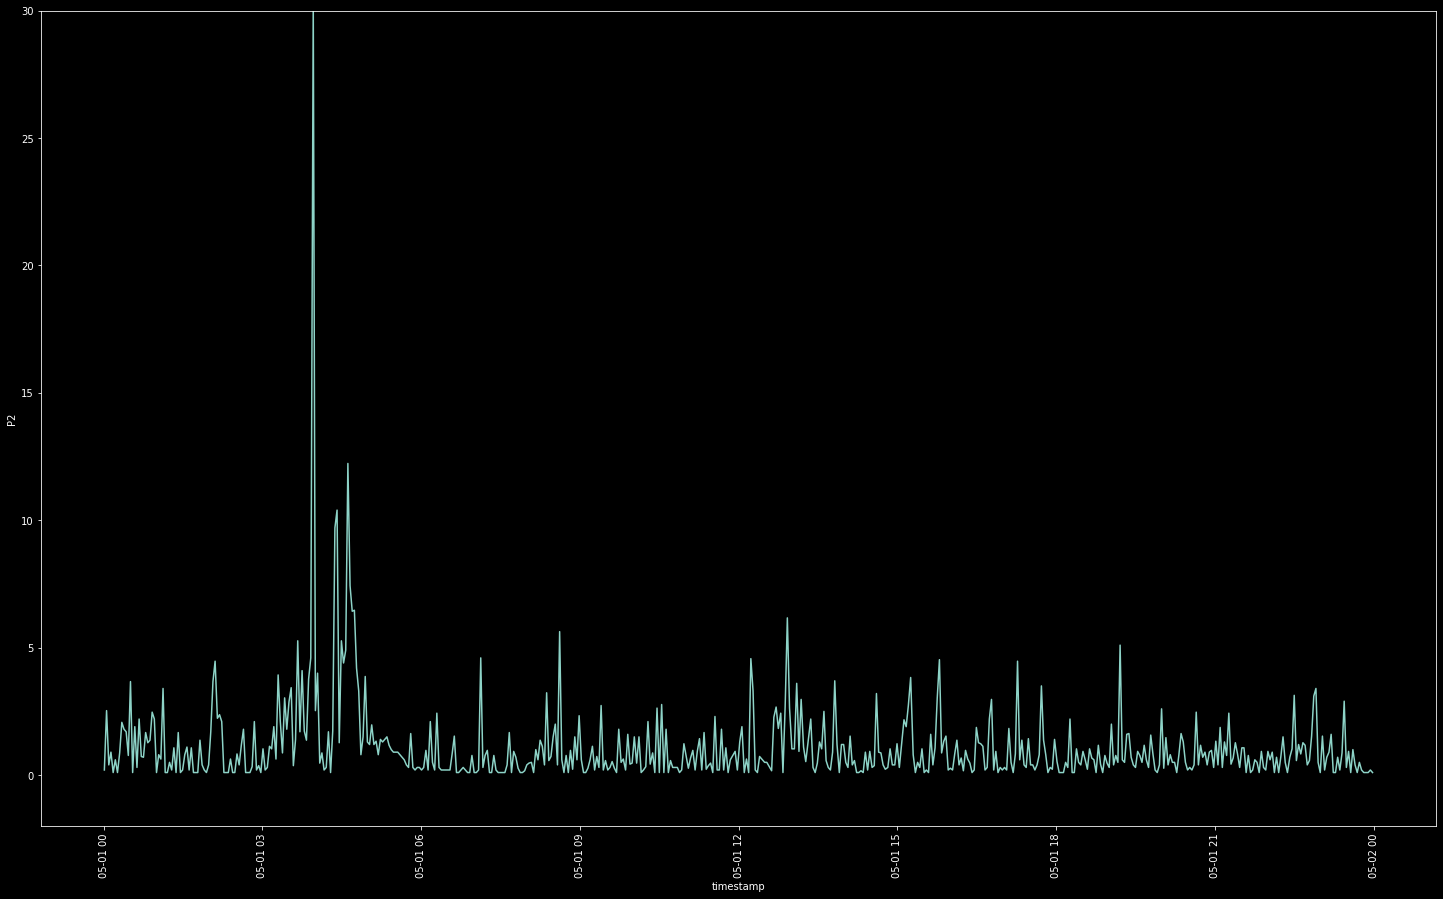

In [29]:

plt.figure(figsize=(25, 15))
ax = sns.lineplot(data=df_sds.query("sensor_id==996 and date=='2021-05-01'"), x='timestamp', y='P2')
plt.xticks(rotation=90)
plt.ylim(-2, 30);

In [ ]:
df_sds.P1.replace(0, np.nan)
df_sds.P2.replace(0, np.nan)


In [40]:
df_sds.timestamp = pd.to_datetime(df_sds.timestamp)
df_sds['hour'] = df_sds.timestamp.dt.hour
df_sds['date'] = pd.to_datetime(df_sds.timestamp.dt.date)
df_sds_grouped = df_sds.groupby(['hour', 'date', 'lat', 'lon']).mean().reset_index()
df_sds_grouped_std = df_sds.groupby(['hour', 'date', 'location', 'sensor_id', 'lat', 'lon']).std().reset_index()

df_sds_grouped_std.rename(columns={'P1': 'PM10_std', 'P2': 'PM2p5_std'}, inplace=True)
df_sds_grouped.rename(columns={'P1': 'PM10', 'P2': 'PM2p5'}, inplace=True)

df_sds_merged = df_sds_grouped.merge(df_sds_grouped_std, how='left', on=['hour', 'date', 'lat', 'lon'])

df_sds_merged.head()

,hour,date,location,sensor_id,lat,lon,PM10,PM2p5,PM10_std,PM2p5_std
0,0,2020-01-01,277,581,50.074,8.436,162.614400,124.803200,7.260113,5.791964
1,0,2020-01-01,328,691,50.086,8.576,577.931250,382.749583,105.909517,85.541710
2,0,2020-01-01,365,761,50.128,8.728,635.038333,425.687083,166.011032,121.509858
3,0,2020-01-01,487,996,50.126,8.698,671.661250,358.590833,147.036590,91.828947
4,0,2020-01-01,622,1262,50.112,8.704,467.914400,256.256400,80.371247,51.632092


In [148]:
df_bme = pd.read_csv("../data/SensorCommunity/2020-01_bme280.csv").drop(['altitude', 'pressure_sealevel', 'sensor_id', 'location'], axis=1)
df_bmp = pd.read_csv("../data/SensorCommunity/2020-01_bmp280.csv").drop(['altitude', 'pressure_sealevel', 'sensor_id', 'location'], axis=1)
df_dht = pd.read_csv("../data/SensorCommunity/2020-01_dht22.csv").drop(['sensor_id', 'location'], axis=1)


In [149]:
df_environment = pd.concat([df_bme, df_bmp, df_dht], axis=0)
df_environment.head()

,sensor_type,lat,lon,timestamp,pressure,temperature,humidity
0,BME280,53.094,8.800,2020-01-01T00:00:33,103374.0,2.49,100.00
1,BME280,53.072,8.852,2020-01-01T00:01:47,103593.0,3.56,81.81
2,BME280,53.068,8.870,2020-01-01T00:01:58,103358.0,1.94,99.14
3,BME280,53.140,8.904,2020-01-01T00:02:17,103563.0,-0.09,99.44
4,BME280,53.094,8.800,2020-01-01T00:03:00,103368.0,2.50,100.00


In [156]:
df_environment.query("hour==0 and date=='2020-01-01' and lat==50.042000 and lon==8.436000")['temperature'].std()

nan

In [150]:

df_environment.timestamp = pd.to_datetime(df_environment.timestamp)
df_environment['hour'] = df_environment.timestamp.dt.hour
df_environment['date'] = pd.to_datetime(df_environment.timestamp.dt.date)
df_environment_grouped = df_environment.groupby(['hour', 'date', 'lat', 'lon']).mean().reset_index()
df_environment_grouped_std = df_environment.groupby(['hour', 'date', 'lat', 'lon']).std().reset_index()

df_environment_grouped_std.rename(columns={'pressure': 'pressure_std', 'temperature': 'temperature_std', 'humidity': 'humidity_std'}, inplace=True)
df_environment_merged = df_environment_grouped.merge(df_environment_grouped_std, how='left', on=['hour', 'date', 'lat', 'lon'])
df_environment_merged.head()

,hour,date,lat,lon,pressure,temperature,humidity,pressure_std,temperature_std,humidity_std
0,0,2020-01-01,50.042000,8.436000,NaN,2.700000,96.0000,NaN,NaN,NaN
1,0,2020-01-01,50.046000,8.852000,NaN,-0.536000,98.8920,NaN,0.111355,0.351094
2,0,2020-01-01,50.055659,8.692377,NaN,-0.108333,99.9000,NaN,0.210417,0.000000
3,0,2020-01-01,50.058000,8.688000,102132.965833,6.958333,53.0875,10.008531,0.067545,0.416280
4,0,2020-01-01,50.070000,8.436000,NaN,1.432000,93.3520,NaN,0.124900,0.345350


In [151]:
df_environment_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 65855 entries, 0 to 65854
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   hour             65855 non-null  int64         
 1   date             65855 non-null  datetime64[ns]
 2   lat              65855 non-null  float64       
 3   lon              65855 non-null  float64       
 4   pressure         10854 non-null  float64       
 5   temperature      65760 non-null  float64       
 6   humidity         64666 non-null  float64       
 7   pressure_std     10828 non-null  float64       
 8   temperature_std  65548 non-null  float64       
 9   humidity_std     64456 non-null  float64       
dtypes: datetime64[ns](1), float64(8), int64(1)
memory usage: 5.5 MB


In [152]:
for col in df_environment_merged.columns:
    print(f"{col}: {df_environment_merged[col].isna().sum()}")

hour: 0
date: 0
lat: 0
lon: 0
pressure: 55001
temperature: 95
humidity: 1189
pressure_std: 55027
temperature_std: 307
humidity_std: 1399


In [158]:
df = df_sds_merged.drop('sensor_id', axis=1).merge(df_environment_merged, how='left', on=['hour', 'date', 'lat', 'lon'])
df

,hour,date,location,lat,lon,PM10,PM2p5,PM10_std,PM2p5_std,pressure,temperature,humidity,pressure_std,temperature_std,humidity_std
0,0,2020-01-01,277,50.074000,8.436000,162.614400,124.803200,7.260113,5.791964,NaN,2.287500,48.389583,NaN,0.473837,49.929897
1,0,2020-01-01,328,50.086000,8.576000,577.931250,382.749583,105.909517,85.541710,NaN,NaN,NaN,NaN,NaN,NaN
2,0,2020-01-01,365,50.128000,8.728000,635.038333,425.687083,166.011032,121.509858,NaN,0.866667,76.400000,NaN,0.123945,0.829877
3,0,2020-01-01,487,50.126000,8.698000,671.661250,358.590833,147.036590,91.828947,NaN,0.900000,1.000000,NaN,0.093250,0.000000
4,0,2020-01-01,622,50.112000,8.704000,467.914400,256.256400,80.371247,51.632092,NaN,1.868000,99.900000,NaN,0.137598,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73771,23,2020-01-31,23450,53.080000,8.838000,9.452364,8.683758,0.654969,0.595197,NaN,15.218675,88.081325,NaN,0.117347,0.748138
73772,23,2020-01-31,23531,50.122000,8.644000,1.592759,1.078966,0.951784,0.577855,100028.625517,13.491034,70.155172,5.430187,0.075751,0.273791
73773,23,2020-01-31,23583,53.070000,8.784000,6.192083,5.435417,3.818140,3.095155,NaN,11.412500,99.900000,NaN,0.061237,0.000000
73774,23,2020-01-31,24924,50.054000,8.790000,1.962609,0.954348,0.684439,0.178805,NaN,12.943478,83.539130,NaN,0.094514,0.863786


In [159]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73776 entries, 0 to 73775
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   hour             73776 non-null  int64         
 1   date             73776 non-null  datetime64[ns]
 2   location         73776 non-null  int64         
 3   lat              73776 non-null  float64       
 4   lon              73776 non-null  float64       
 5   PM10             73776 non-null  float64       
 6   PM2p5            73776 non-null  float64       
 7   PM10_std         73570 non-null  float64       
 8   PM2p5_std        73570 non-null  float64       
 9   pressure         11488 non-null  float64       
 10  temperature      66122 non-null  float64       
 11  humidity         65044 non-null  float64       
 12  pressure_std     11473 non-null  float64       
 13  temperature_std  65989 non-null  float64       
 14  humidity_std     64912 non-null  float

In [ ]:
months = ['2020-01', '2020-02']
for month in months: 
    print(month)
    df_bme = pd.read_csv(f'{month}_bme280.csv').drop(['altitude','pressure_sealevel'], axis=1)
    df_bmp = pd.read_csv(f'{month}_bmp280.csv').drop(['altitude','pressure_sealevel'], axis=1)
    df_dht = pd.read_csv(f'{month}_dht22.csv')
    df_sds = pd.read_csv(f'{month}_sds011.csv').drop(['durP1','ratioP1','durP2','ratioP2'], axis=1)

    

In [172]:
from os import walk

# dirpath, dirnames, filenames = 
filenames = list(walk("../data/SensorCommunity"))[0][2]

for file in filenames:
    print(file)

2021-10_sds011.csv
2020-08_bme280.csv
2020-10_bmp280.csv
2020-01_dht22.csv
2021-07_dht22.csv
2020-01_bmp280.csv
2020-05_bme280.csv
2021-02_bmp280.csv
2021-06_bme280.csv
2021-01_sds011.csv
2020-02_sds011.csv
2020-04_bmp280.csv
2021-03_bme280.csv
2021-07_bmp280.csv
2022-02_bmp280.csv
2021-04_sds011.csv
2020-07_sds011.csv
2022-01_sds011.csv
2020-09_bmp280.csv
2022-02_dht22.csv
2020-07_dht22.csv
2021-01_dht22.csv
2021-12_bme280.csv
2021-09_sds011.csv
2020-11_bme280.csv
2021-11_bmp280.csv
2020-12_bmp280.csv
2020-11_sds011.csv
2021-09_bme280.csv
2021-12_sds011.csv
2021-12_dht22.csv
2021-03_sds011.csv
2021-06_dht22.csv
2022-01_bme280.csv
2020-03_bmp280.csv
2020-07_bme280.csv
2021-04_bme280.csv
2021-06_sds011.csv
2020-05_sds011.csv
2020-02_bme280.csv
2020-06_bmp280.csv
2021-01_bme280.csv
2021-05_bmp280.csv
2020-08_sds011.csv
2021-10_bme280.csv
2020-12_dht22.csv
2020-06_dht22.csv
2021-08_bmp280.csv
2020-01_bme280.csv
2020-05_bmp280.csv
2021-02_bme280.csv
2021-06_bmp280.csv
2021-08_dht22.csv
202